In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [51]:
# Function to parse a string into a NumPy array
def parse_vector_string(vector_string, vector_length):
    if isinstance(vector_string, float):
        return np.array([vector_string], dtype=np.float32)
    
    values = vector_string.strip('[]').split()
    if len(values) == vector_length:
        vector = np.array([float(value) for value in values], dtype=np.float32)
        return vector
    else:
        return np.zeros(vector_length, dtype=np.float32)

In [52]:
# Load your CSV file
data = pd.read_csv('Final_Vectorised_Dataset.csv')

# Define the expected length of your vectors
YOUR_VECTOR_LENGTH = 3041  # Modify this to the actual length of your vectors

In [53]:
# Assuming the CSV file has a column 'Title_Vector' containing vector strings
requirement_vectors = data['Title_Vector'].apply(parse_vector_string, vector_length=YOUR_VECTOR_LENGTH)

# Filter out entries with invalid vectors
requirement_vectors = requirement_vectors[requirement_vectors.apply(lambda x: x.shape == (YOUR_VECTOR_LENGTH,))]

# Extract relevant columns
complexity = data[['Lines of Code', 'Cyclomatic Complexity']].values
consequence = data[['Number of Calls', 'TBF', 'Reliability']].values

In [54]:
# Convert the filtered arrays to a NumPy array and normalize
requirement_vectors = np.array(requirement_vectors.tolist(), dtype=np.float32)
scaler = MinMaxScaler()
requirement_vectors = scaler.fit_transform(requirement_vectors)
complexity = scaler.fit_transform(complexity)
consequence = scaler.fit_transform(consequence)

In [55]:
# Split the data into training and testing sets
req_train, req_test, comp_train, comp_test, conseq_train, conseq_test = train_test_split(
    requirement_vectors, complexity, consequence, test_size=0.2)

In [56]:
# Build a neural network for complexity prediction
input_layer = Input(shape=(YOUR_VECTOR_LENGTH,))
complexity_output = Dense(2, activation='linear')(input_layer)  # 2 outputs for Complexity
complexity_model = Model(input_layer, complexity_output)
complexity_model.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
# Train the complexity prediction model
complexity_model.fit(req_train, comp_train, epochs=100, batch_size=32, validation_data=(req_test, comp_test))

Epoch 1/100
76/76 [==============================] - 1s 3ms/step - loss: 0.0642 - val_loss: 0.0714
Epoch 2/100
76/76 [==============================] - 0s 3ms/step - loss: 0.0552 - val_loss: 0.0654
Epoch 3/100
76/76 [==============================] - 0s 3ms/step - loss: 0.0525 - val_loss: 0.0638
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0634
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0633
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0632
Epoch 7/100
76/76 [==============================] - 0s 3ms/step - loss: 0.0519 - val_loss: 0.0633
Epoch 8/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0632
Epoch 9/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0632
Epoch 10/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0632
Epoch 11/

76/76 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0633
Epoch 84/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0632
Epoch 85/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0632
Epoch 86/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0634
Epoch 87/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0632
Epoch 88/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0632
Epoch 89/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0632
Epoch 90/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0633
Epoch 91/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0520 - val_loss: 0.0633
Epoch 92/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0519 - val_loss: 0.0632
Epoch 93/100


In [58]:
# Predict complexity values on the validation set
predicted_complexity = complexity_model.predict(req_test)

20/20 [==============================] - 0s 1ms/step


In [59]:
# Calculate MSE and MAE for complexity prediction
mse_complexity = mean_squared_error(comp_test, predicted_complexity)
mae_complexity = mean_absolute_error(comp_test, predicted_complexity)

In [60]:
# Calculate the percentage of MSE and MAE relative to the range of complexity values
range_complexity = np.max(comp_test) - np.min(comp_test)
percentage_mse_complexity = (mse_complexity / range_complexity) * 100
percentage_mae_complexity = (mae_complexity / range_complexity) * 100

In [61]:
print(f'Complexity Prediction MSE: {mse_complexity:.2f}')
print(f'Complexity Prediction MAE: {mae_complexity:.2f}')
print(f'Complexity Prediction MSE as Percentage: {percentage_mse_complexity:.2f}%')
print(f'Complexity Prediction MAE as Percentage: {percentage_mae_complexity:.2f}%')

Complexity Prediction MSE: 0.06
Complexity Prediction MAE: 0.16
Complexity Prediction MSE as Percentage: 6.32%
Complexity Prediction MAE as Percentage: 15.68%


In [62]:
# Build a neural network for consequence prediction
consequence_output = Dense(3, activation='linear')(input_layer)  # 3 outputs for Consequence
consequence_model = Model(input_layer, consequence_output)
consequence_model.compile(optimizer='adam', loss='mean_squared_error')

In [63]:
# Train the consequence prediction model
consequence_model.fit(req_train, conseq_train, epochs=100, batch_size=32, validation_data=(req_test, conseq_test))

Epoch 1/100
76/76 [==============================] - 0s 2ms/step - loss: 0.2208 - val_loss: 0.2042
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1863 - val_loss: 0.1727
Epoch 3/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1578 - val_loss: 0.1465
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1340 - val_loss: 0.1246
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1142 - val_loss: 0.1064
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0980 - val_loss: 0.0916
Epoch 7/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0849 - val_loss: 0.0797
Epoch 8/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0745 - val_loss: 0.0703
Epoch 9/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0663 - val_loss: 0.0629
Epoch 10/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0601 - val_loss: 0.0574
Epoch 11/

76/76 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0430
Epoch 84/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0430
Epoch 85/100
76/76 [==============================] - 0s 1ms/step - loss: 0.0440 - val_loss: 0.0430
Epoch 86/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0430
Epoch 87/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0430
Epoch 88/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0430
Epoch 89/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0430
Epoch 90/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0430
Epoch 91/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0430
Epoch 92/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0440 - val_loss: 0.0430
Epoch 93/100


In [64]:
# Predict consequence values on the validation set
predicted_consequence = consequence_model.predict(req_test)

20/20 [==============================] - 0s 945us/step


In [65]:
# Calculate MSE and MAE for consequence prediction
mse_consequence = mean_squared_error(conseq_test, predicted_consequence)
mae_consequence = mean_absolute_error(conseq_test, predicted_consequence)

In [66]:
# Calculate the percentage of MSE and MAE relative to the range of consequence values
range_consequence = np.max(conseq_test) - np.min(conseq_test)
percentage_mse_consequence = (mse_consequence / range_consequence) * 100
percentage_mae_consequence = (mae_consequence / range_consequence) * 100

In [67]:
print(f'Consequence Prediction MSE: {mse_consequence:.2f}')
print(f'Consequence Prediction MAE: {mae_consequence:.2f}')
print(f'Consequence Prediction MSE as Percentage: {percentage_mse_consequence:.2f}%')
print(f'Consequence Prediction MAE as Percentage: {percentage_mae_consequence:.2f}%')

Consequence Prediction MSE: 0.04
Consequence Prediction MAE: 0.13
Consequence Prediction MSE as Percentage: 4.30%
Consequence Prediction MAE as Percentage: 12.77%


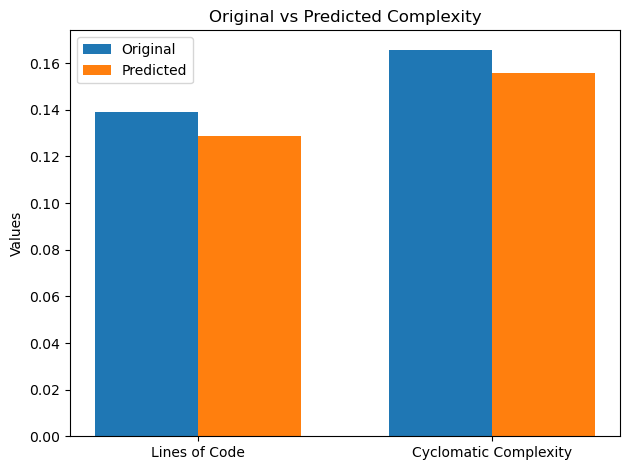

In [68]:
import matplotlib.pyplot as plt

# Extract 'Lines of Code' and 'Cyclomatic Complexity' from the test set
lines_of_code_original = comp_test[:, 0]
cyclomatic_complexity_original = comp_test[:, 1]

# Extract the predicted values
lines_of_code_predicted = predicted_complexity[:, 0]
cyclomatic_complexity_predicted = predicted_complexity[:, 1]

# Create a bar graph
labels = ['Lines of Code', 'Cyclomatic Complexity']
original_values = [lines_of_code_original.mean(), cyclomatic_complexity_original.mean()]
predicted_values = [lines_of_code_predicted.mean(), cyclomatic_complexity_predicted.mean()]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_values, width, label='Original')
rects2 = ax.bar(x + width/2, predicted_values, width, label='Predicted')

ax.set_ylabel('Values')
ax.set_title('Original vs Predicted Complexity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


In [69]:
# Calculate MSE for Cyclomatic Complexity
mse_cyclomatic_complexity = mean_squared_error(comp_test[:, 1], predicted_complexity[:, 1])

# Calculate MAE for Cyclomatic Complexity
mae_cyclomatic_complexity = mean_absolute_error(comp_test[:, 1], predicted_complexity[:, 1])

# Calculate the percentage of MSE relative to the range for Cyclomatic Complexity
range_cyclomatic_complexity = np.max(comp_test[:, 1]) - np.min(comp_test[:, 1])
percentage_mse_cyclomatic_complexity = (mse_cyclomatic_complexity / range_cyclomatic_complexity) * 100

# Calculate the percentage of MAE relative to the range for Cyclomatic Complexity
percentage_mae_cyclomatic_complexity = (mae_cyclomatic_complexity / range_cyclomatic_complexity) * 100

print(f'Cyclomatic Complexity Prediction MSE: {mse_cyclomatic_complexity:.2f}')
print(f'Cyclomatic Complexity Prediction MAE: {mae_cyclomatic_complexity:.2f}')
print(f'Cyclomatic Complexity Prediction MSE as Percentage: {percentage_mse_cyclomatic_complexity:.2f}%')
print(f'Cyclomatic Complexity Prediction MAE as Percentage: {percentage_mae_cyclomatic_complexity:.2f}%')

# Calculate MSE for Lines of Code
mse_lines_of_code = mean_squared_error(comp_test[:, 0], predicted_complexity[:, 0])

# Calculate MAE for Lines of Code
mae_lines_of_code = mean_absolute_error(comp_test[:, 0], predicted_complexity[:, 0])

# Calculate the percentage of MSE relative to the range for Lines of Code
range_lines_of_code = np.max(comp_test[:, 0]) - np.min(comp_test[:, 0])
percentage_mse_lines_of_code = (mse_lines_of_code / range_lines_of_code) * 100

# Calculate the percentage of MAE relative to the range for Lines of Code
percentage_mae_lines_of_code = (mae_lines_of_code / range_lines_of_code) * 100

print(f'Lines of Code Prediction MSE: {mse_lines_of_code:.2f}')
print(f'Lines of Code Prediction MAE: {mae_lines_of_code:.2f}')
print(f'Lines of Code Prediction MSE as Percentage: {percentage_mse_lines_of_code:.2f}%')
print(f'Lines of Code Prediction MAE as Percentage: {percentage_mae_lines_of_code:.2f}%')


Cyclomatic Complexity Prediction MSE: 0.06
Cyclomatic Complexity Prediction MAE: 0.16
Cyclomatic Complexity Prediction MSE as Percentage: 6.18%
Cyclomatic Complexity Prediction MAE as Percentage: 15.51%
Lines of Code Prediction MSE: 0.06
Lines of Code Prediction MAE: 0.16
Lines of Code Prediction MSE as Percentage: 6.46%
Lines of Code Prediction MAE as Percentage: 15.86%


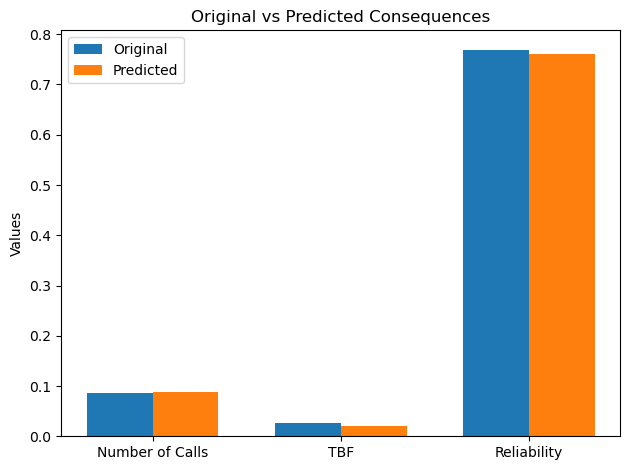

In [70]:
import matplotlib.pyplot as plt

# Extract 'Number of Calls', 'TBF', and 'Reliability' from the test set
num_calls_original = conseq_test[:, 0]
tbf_original = conseq_test[:, 1]
reliability_original = conseq_test[:, 2]

# Extract the predicted values
num_calls_predicted = predicted_consequence[:, 0]
tbf_predicted = predicted_consequence[:, 1]
reliability_predicted = predicted_consequence[:, 2]

# Create a bar graph
labels = ['Number of Calls', 'TBF', 'Reliability']
original_values = [num_calls_original.mean(), tbf_original.mean(), reliability_original.mean()]
predicted_values = [num_calls_predicted.mean(), tbf_predicted.mean(), reliability_predicted.mean()]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_values, width, label='Original')
rects2 = ax.bar(x + width/2, predicted_values, width, label='Predicted')

ax.set_ylabel('Values')
ax.set_title('Original vs Predicted Consequences')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


In [71]:
# Calculate MSE for Number of Calls
mse_number_of_calls = mean_squared_error(conseq_test[:, 2], predicted_consequence[:, 2])

# Calculate MAE for Number of Calls
mae_number_of_calls = mean_absolute_error(conseq_test[:, 2], predicted_consequence[:, 2])

# Calculate the percentage of MSE and MAE relative to the range for Number of Calls
range_number_of_calls = np.max(conseq_test[:, 2]) - np.min(conseq_test[:, 2])
percentage_mse_number_of_calls = (mse_number_of_calls / range_number_of_calls) * 100
percentage_mae_number_of_calls = (mae_number_of_calls / range_number_of_calls) * 100

print(f'Number of Calls Prediction MSE: {mse_number_of_calls:.2f}')
print(f'Number of Calls Prediction MAE: {mae_number_of_calls:.2f}')
print(f'Number of Calls Prediction MSE as Percentage: {percentage_mse_number_of_calls:.2f}%')
print(f'Number of Calls Prediction MAE as Percentage: {percentage_mae_number_of_calls:.2f}%')


Number of Calls Prediction MSE: 0.11
Number of Calls Prediction MAE: 0.27
Number of Calls Prediction MSE as Percentage: 11.00%
Number of Calls Prediction MAE as Percentage: 27.13%


In [72]:
# Calculate MSE for TBF
mse_tbf = mean_squared_error(conseq_test[:, 0], predicted_consequence[:, 0])

# Calculate MAE for TBF
mae_tbf = mean_absolute_error(conseq_test[:, 0], predicted_consequence[:, 0])

# Calculate the percentage of MSE and MAE relative to the range for TBF
range_tbf = np.max(conseq_test[:, 0]) - np.min(conseq_test[:, 0])
percentage_mse_tbf = (mse_tbf / range_tbf) * 100
percentage_mae_tbf = (mae_tbf / range_tbf) * 100

print(f'TBF Prediction MSE: {mse_tbf:.2f}')
print(f'TBF Prediction MAE: {mae_tbf:.2f}')
print(f'TBF Prediction MSE as Percentage: {percentage_mse_tbf:.2f}%')
print(f'TBF Prediction MAE as Percentage: {percentage_mae_tbf:.2f}%')


TBF Prediction MSE: 0.01
TBF Prediction MAE: 0.08
TBF Prediction MSE as Percentage: 1.14%
TBF Prediction MAE as Percentage: 7.66%


In [73]:
# Calculate MSE for Reliability
mse_reliability = mean_squared_error(conseq_test[:, 1], predicted_consequence[:, 1])

# Calculate MAE for Reliability
mae_reliability = mean_absolute_error(conseq_test[:, 1], predicted_consequence[:, 1])

# Calculate the percentage of MSE and MAE relative to the range for Reliability
range_reliability = np.max(conseq_test[:, 1]) - np.min(conseq_test[:, 1])
percentage_mse_reliability = (mse_reliability / range_reliability) * 100
percentage_mae_reliability = (mae_reliability / range_reliability) * 100

print(f'Reliability Prediction MSE: {mse_reliability:.2f}')
print(f'Reliability Prediction MAE: {mae_reliability:.2f}')
print(f'Reliability Prediction MSE as Percentage: {percentage_mse_reliability:.2f}%')
print(f'Reliability Prediction MAE as Percentage: {percentage_mae_reliability:.2f}%')


Reliability Prediction MSE: 0.01
Reliability Prediction MAE: 0.04
Reliability Prediction MSE as Percentage: 0.88%
Reliability Prediction MAE as Percentage: 4.17%
